In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#step 1

In [3]:
np.random.seed(42)

In [4]:
months=pd.date_range(start="2023-01-01", periods=24,freq='M')
data=pd.DataFrame({
    "Month":months,
    "Marketing_Spend": np.random.uniform(50,200,size=24),
    "Promotion_Flag": np.random.choice([0,1],size=24),
    "Season": np.random.choice(['Winter','Spring','Summer','Fall'],size=24),
    "Product_Category:": np.random.choice(['A','B','C'],size=24),
    "Channel": np.random.choice(['Online','Retail','Distributor'],size=24)
})

C:\Users\ayush\AppData\Local\Temp\ipykernel_28716\1037077334.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months=pd.date_range(start="2023-01-01", periods=24,freq='M')


In [5]:
#Stimulate Revenue based on influencing features

In [6]:
data['Revenue']=(
    50 + 
    0.8 * data['Marketing_Spend'] +
     15 * data["Promotion_Flag"] +
    np.random.normal(0, 10, size=24)
)

In [7]:
data_encoded =pd.get_dummies(data.drop(columns=["Month"]),drop_first=True)

In [8]:
x=data_encoded.drop('Revenue',axis=1)
y=data_encoded["Revenue"]
model=LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

In [9]:
mse=mean_squared_error(y,y_pred)
r2 = r2_score(y, y_pred)

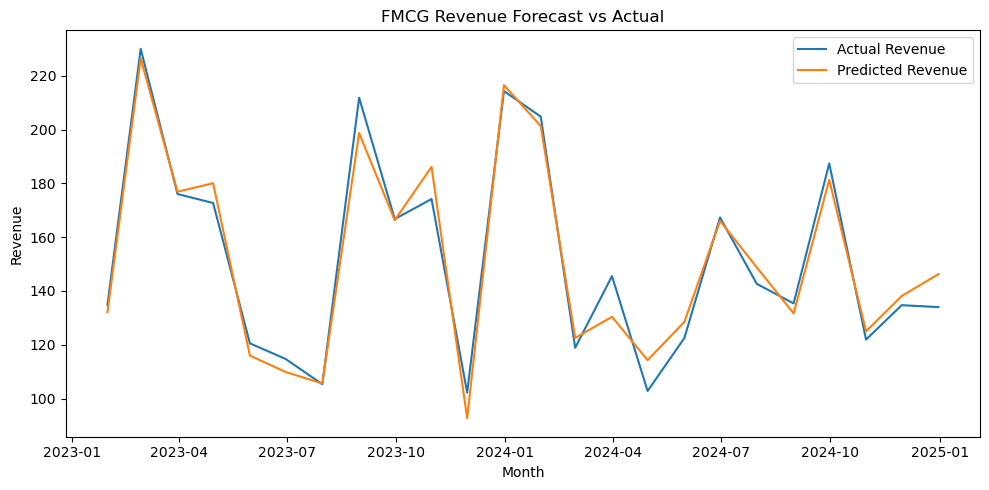

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(x=months, y=y, label='Actual Revenue')
sns.lineplot(x=months, y=y_pred, label='Predicted Revenue')
plt.title("FMCG Revenue Forecast vs Actual")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R-squared: 0.96
Mean Squared Error: 50.68


In [13]:
df=pd.read_csv("fmcg_sales_data.csv")

In [14]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year
df = pd.get_dummies(df, columns=['Product_Category', 'Distribution_Channel'], drop_first=True)
df['Is_Holiday_Season'] = df['Month'].isin([11, 12]).astype(int)
df.drop(['Date'], axis=1, inplace=True)

C:\Users\ayush\AppData\Local\Temp\ipykernel_28716\1282229136.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Date']).dt.month
C:\Users\ayush\AppData\Local\Temp\ipykernel_28716\1282229136.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df['Date']).dt.year


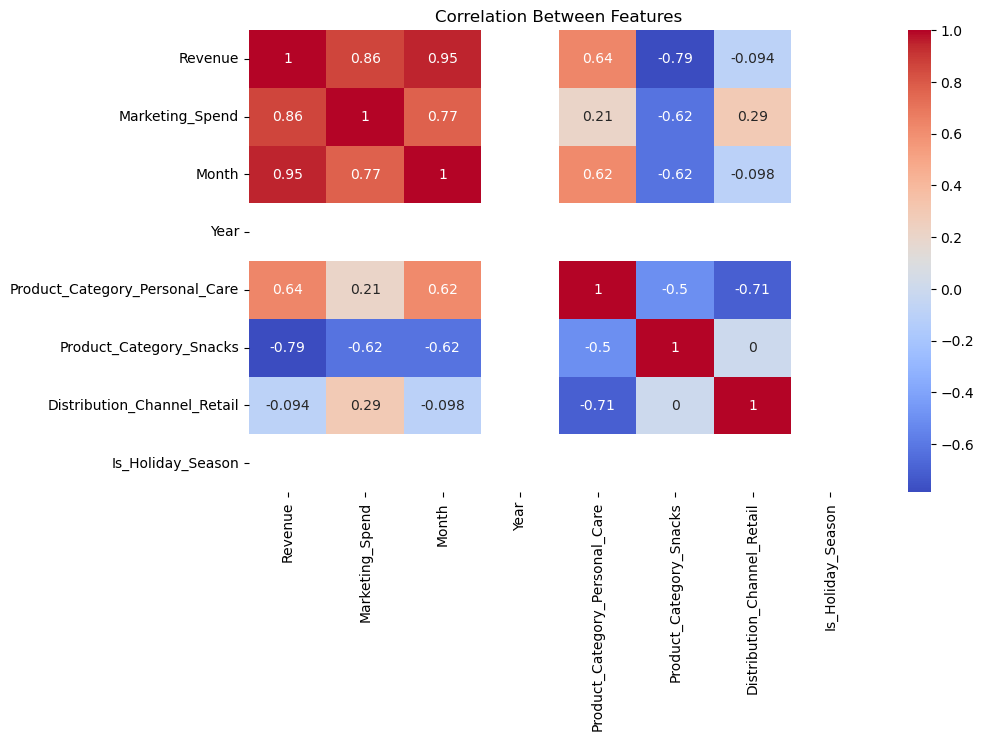

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

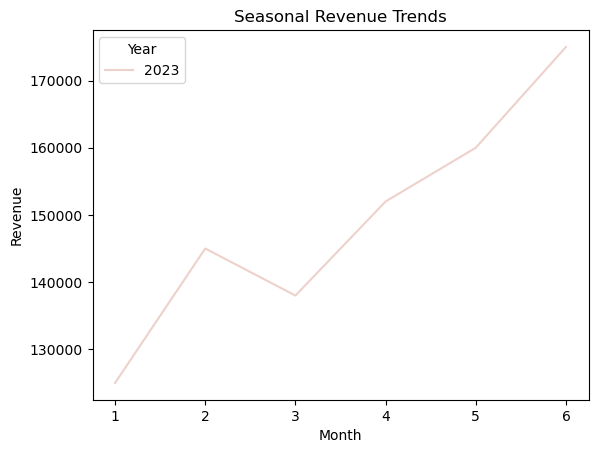

In [16]:
sns.lineplot(data=df,x='Month',y='Revenue', hue='Year')
plt.title("Seasonal Revenue Trends")
plt.show()


In [17]:
x=df.drop('Revenue',axis=1)
y=df['Revenue']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

RMSE: 4237.13
R-squared: 0.82


In [23]:
coeff_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_})
print("\nRevenue Driver Insights:\n", coeff_df.sort_values(by='Coefficient', ascending=False))


Revenue Driver Insights:
                           Feature   Coefficient
1                           Month  6.029412e+03
3  Product_Category_Personal_Care  3.117647e+03
0                 Marketing_Spend  2.735294e+00
2                            Year  2.273737e-13
6               Is_Holiday_Season  0.000000e+00
5     Distribution_Channel_Retail -3.117647e+03
4         Product_Category_Snacks -4.470588e+03
